# Creación de un modelo de Machine Learning para planes de telefonía

# Contenido

* [Introducción](#a)
* [Objetivos](#b)
* [Etapas](#c)
* [Inicialización: descripción de datos](#d)
    * [Cargar datos](#d1)
    * [Exploración inicial de datos](#d2)
    * [Análisis exploratorio y descriptivo como referencia](#d4)
    * [Conclusiones del apartado](#d3)
* [Segmentación de datos](#e)
    * [Conclusiones del apartado](#e1)
* [Prueba y entrenamiento de modelos de Machine Learning](#f)
    * [Árbol de decisión](#f1)
    * [Bosque aleatorio](#f2)
    * [Regresión logística](#f3)
    * [Conclusiones del apartado](#f4)
* [Prueba de calidad del modelo](#g)
    * [Árbol de decisión](#g1)
    * [Bosque aleatorio](#g2)
    * [Decisión final y conclusiones del apartado](#g3)
* [Prueba de cordura](#h)
    * [Conclusiones del apartado](#h1)
* [Conclusiones finales](#i)


# Introducción <a id='a'></a>

La compañía de telecomunicaciones móviles Megaline, viendo el análisis realizado previamente en el estudio de sus planes de telefonía, ahora nos propone un nuevo reto y análisis al ver que muchos de sus clientes utilizan planes heredados y que no siempre se ajustan a lo que ellos necesitan. Megaline quiere que desarrollemos un modelo de Machine Learning que pueda analizar el comportamiento de sus clientes y (pronosticar) recomendar uno de los planes de la empresa: Smart o Ultra. Para el desarrollo de este proyecto utilizaremos modelos de aprendizaje automático supervisados, en este caso, los de clasificación.  

# Objetivos <a id='b'></a>

*Debido a que nuestro objetivo es el modelamiento, no tenemos hipótesis estadísticas a probar en específico esta vez.* 

Nuestro principal objetivo será determinar el modelo con la mayor exactitud posible, teniendo como umbral de exactitud un 0.75.

Como tarea adicional, probaremos la calidad del modelo y realizaremos una prueba de cordura.

# Etapas del análisis <a id='c'></a>

En este proyecto, seguiremos un esquema necesario para solucionar el problema de la creación y prueba de un modelo de Machine Learning. Para esto, seguiremos a grandes rasgos el siguiente proceso:

1. Descripción de los datos
2. Segmentación de los datos
3. Prueba y entrenamiento de los modelos de Machine Learning
4. Prueba de calidad del modelo
5. Prueba de cordura
6. Conclusiones finales

Debido a que el preprocesamiento y análisis exploratorio fueron realizados en el anterior informe, en este presente trabajo se obviarán esos pasos y nos enfocaremos en el modelamiento luego de describir nuestros datos.

# Inicialización: descripción de los datos <a id='d'></a>

**Carga de librerías necesarias**

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd # librerías estándar para manipular datos

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # librerías de sklearn para los modelos y métricas

import warnings
warnings.filterwarnings('ignore') # ignoraremos los warnings de algunas partes del código

## Cargar los datos <a id='d1'></a>

Tenemos solo un dataset con los datos finales y preprocesados:

In [3]:
try:
    data_megaline = pd.read_csv("users_behavior.csv")
except:
    data_megaline = pd.read_csv("datasets/users_behavior.csv")

## Exploración inicial de datos <a id='d2'></a>

Nuestra tabla contiene la siguiente información según su documentación:

* ``calls``: número de llamadas.
* ``minutes``: duración total de la llamada en minutos.
* ``messages``: número de mensajes de texto.
* ``mb_used``: tráfico de internet utilizado en MB.
* ``is_ultra``: si el plan utilizado es el *Ultra* (1), de lo contrario, es Smart (0)

Ahora podemos explorar la tabla:

In [4]:
data_megaline.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
data_megaline.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [6]:
data_megaline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


De lo mostrado previamente, podemos notar que ninguna de nuestra variables cuenta con problemas grandes en su distribución, tipos de datos y valores ausentes. El motivo es precisamente el hecho de que el preprocesamiento ya fue realizado en el anterior trabajo. 

Ahora que conocemos a nuestras variables y sabemos que estas no presentan problemas para su uso, nos enfocaremos en nuestra posible variable objetivo: ``is_ultra``:

In [7]:
data_megaline['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

El 30 % de los usuarios tienen registrado el plan *Ultra* en su suscripción a la empresa Megaline, mientras que el 70 % restante pertenece al plan *Smart*. Esta diferencia muestra y sugiere la existencia de un ligero desbalance de nuestra variable objetivo. Debido a que el problema no se ve lo suficientemente grave como para preocuparnos por él, no se abordará el manejo de este problema por ahora y esa será una limitación de este proyecto.

## Análisis exploratorio y descriptivo como referencia <a id='d4'></a>

En este apartado analizaremos el comportamiento de nuestra variable objetivo para los que consideraremos características, utilizando diagramas de caja:

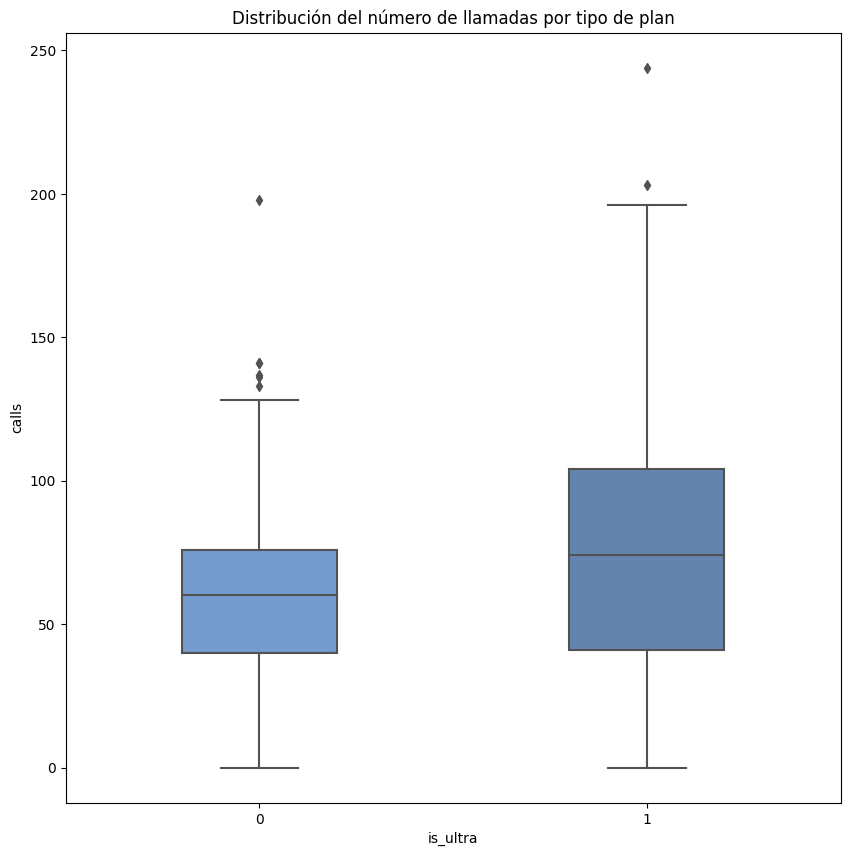

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_megaline, x='is_ultra', y='calls', palette=sns.dark_palette("#69d", reverse=True), width=0.4)
plt.title("Distribución del número de llamadas por tipo de plan")
plt.show()

Tenemos cierta diferencia en el número mediano de llamadas de los usuarios del plan ultra respecto a los que no, aunque podría considerarse ligera a favor de los usuarios Ultra.

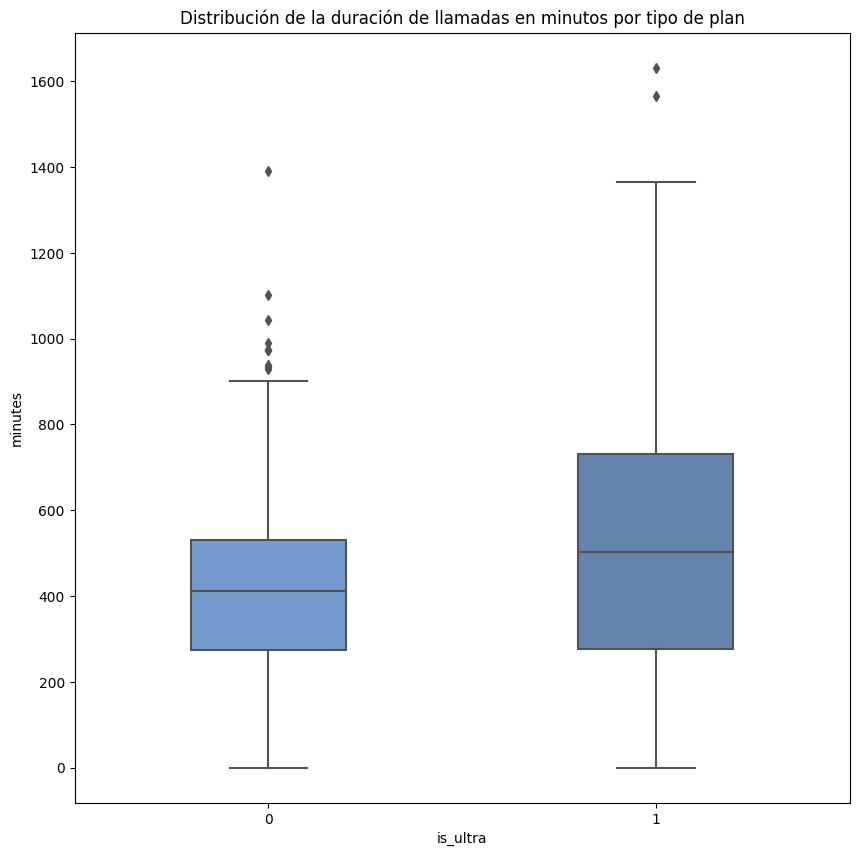

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_megaline, x='is_ultra', y='minutes', palette=sns.dark_palette("#69d", reverse=True), width=0.4)
plt.title("Distribución de la duración de llamadas en minutos por tipo de plan")
plt.show()

En términos de los minutos usados, parece haber una mayor diferencia entre los usuarios de ambos planes, siendo mayor en los usuario del plan Ultra por alrededor de 100 minutos. Aquí los usuarios empiezan a diferenciarse de forma más notable.

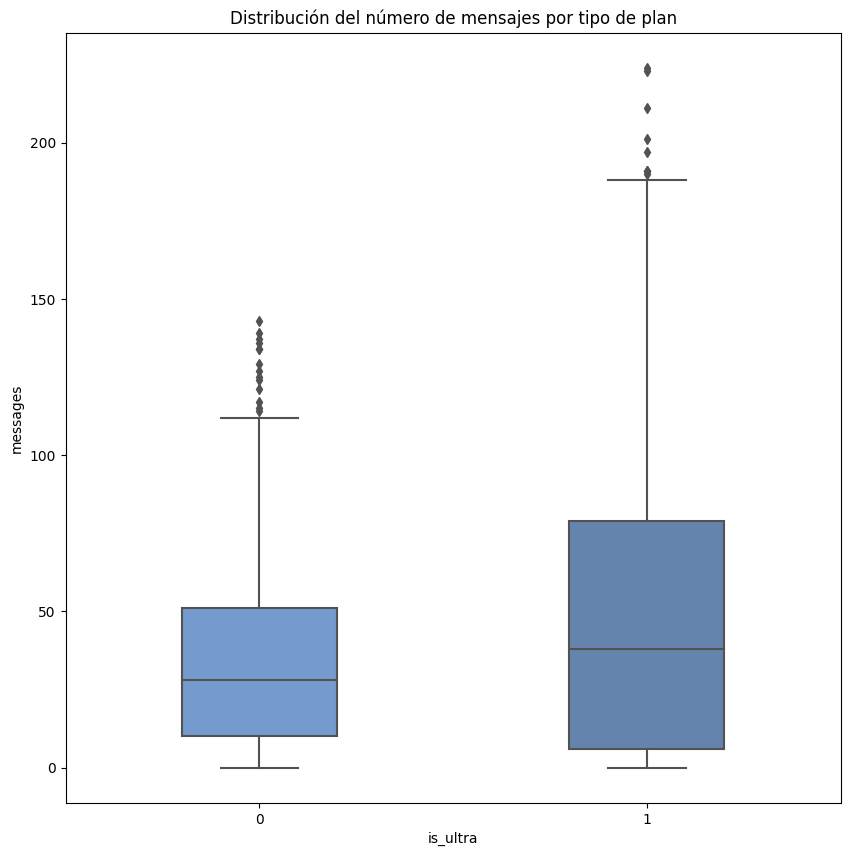

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_megaline, x='is_ultra', y='messages', palette=sns.dark_palette("#69d", reverse=True), width=0.4)
plt.title("Distribución del número de mensajes por tipo de plan")
plt.show()

El gráfico muestra que los usuarios de ambos planes también difieren en su comportamiento de uso de número de mensajes. Notamos una distribución algo más dispersa y en promedio mayor en los usuarios del plan Ultra.

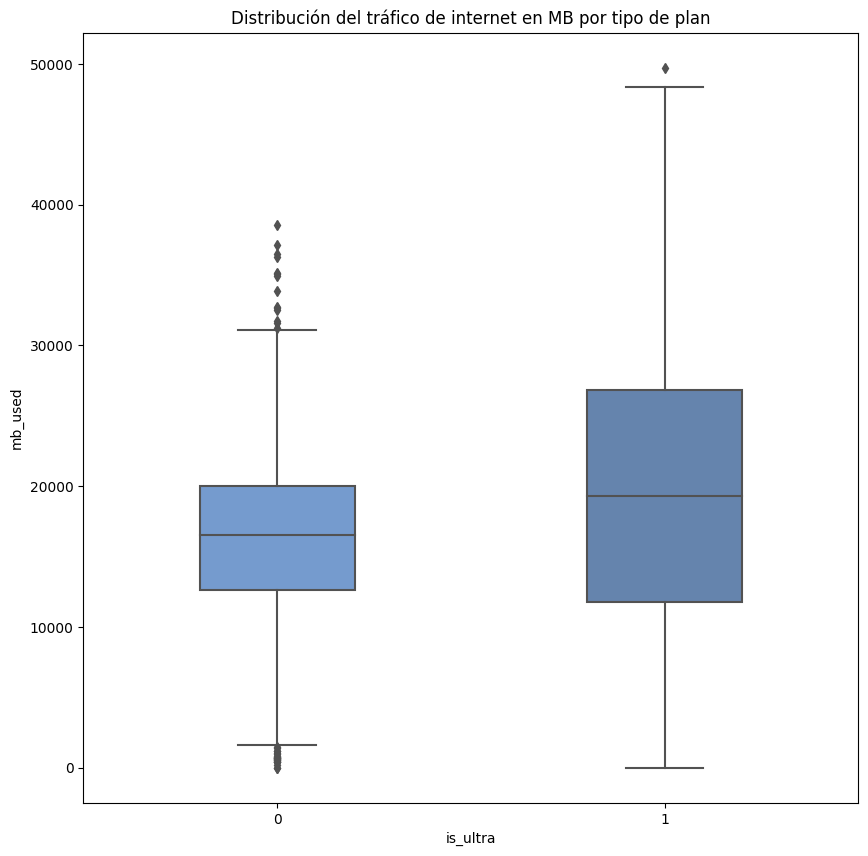

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_megaline, x='is_ultra', y='mb_used', palette=sns.dark_palette("#69d", reverse=True), width=0.4)
plt.title("Distribución del tráfico de internet en MB por tipo de plan")
plt.show()

Para el uso de internet móvil, una diferencia de alrededor de 3 GB al mes podría considerarse grande o pequeña según los costos del servicio y el pago mensual que realizan los usuarios. De todas formas, la diferencia existe y es a favor de los usuarios del plan Ultra.

## Conclusiones del apartado <a id='d3'></a>

En este apartado observamos las principales características y dimos un vistazo general a nuestras variables. No notamos problemas que requieran una etapa de procesado extra debido a que este proceso fue realizado en el trabajo previo. También notamos un ligero desbalance en nuestra variable objetivo, pero se concluyó que su proporción no es grave ni posiblemente genere problemas en la estimación y evaluación de nuestro modelo.

A su vez, notamos que existe una diferenciación en promedio entre los usuarios de ambos planes, teniendo un mayor uso de los servicios en general los usuarios del plan Ultra. Esta segmentación empírica encontrada ayuda a sostener el futuro modelamiento de los clientes debido a sus diferentes comportamientos según los datos que tenemos. 

# Segmentación de los datos <a id='e'></a>

Debido a que realizaremos un modelo de clasificación predictivo, tendremos que definir una especie de relación de nuestra variable objetivo (target) a pronosticar y sus características (features). Ya habíamos anticipado este problema designando a ``is_ultra`` como nuestra variable objetivo, pero continuaremos buscando la relación en un modelo teórico no formal: 

Nuestra variable objetivo (``is_ultra``) teóricamente se relaciona con las variables ``calls``, ``minutes``, ``messages``, y ``mb_used`` (características). Es decir, existe una relación teórica no formal en la que esas características determinarán si el cliente usa un respectivo plan o no (variable objetivo - ``is_ultra``). En la vida real, esta relación tiene sentido y esa será la relación que nos ayude a generar nuestro modelo predictivo.

Guardaremos nuestra semilla generadora de números pseudoaleatorios en la variable ``random_state``.

A continuación, separaremos nuestro dataset en ``target`` y ``features``.

Luego de lo anterior, necesitamos dividir nuestros datos para las respectivas etapas de entrenamiento y validación de nuestro modelo. Usaremos la función "train_test_split" para este objetivo, y emplearemos la proporción 3:1:1 al dividir los datos (60 % para entrenamiento, 20 % para validación y 20 % para la prueba final de calidad):

In [9]:
random_state = 200

In [10]:
target = data_megaline['is_ultra'] # variable objetivo
features = data_megaline.drop('is_ultra', axis=1) # características

Primero dividiremos y separaremos el conjunto de entrenamiento, dejando el 40 % de los datos para separarlos luego en los sets de validación y prueba (sets "split"):

In [43]:
target_train, target_split, features_train, features_split = train_test_split(target, features, test_size=0.40, random_state=random_state)
# primera división: 60 % - 40 %

Ahora dividiremos los datasets "split" (que contienen al 40 % de los datos) en partes iguales que correspondan al dataset de validación y prueba:

In [45]:
target_valid, target_test, features_valid, features_test = train_test_split(target_split, features_split, test_size=0.5, random_state=random_state)
# segunda división: el 40 % restante a mitades iguales

Verificaremos obteniendo el atributo *shape* de cada dataset:

In [111]:
for i in [target_train, target_valid, target_test, features_train, features_valid, features_test]:
    print()
    print(i.shape) # imprime el atributo shape para cada dataset


(1928,)

(643,)

(643,)

(1928, 4)

(643, 4)

(643, 4)


Todo parece estar en orden.

## Pequeñas conclusiones del apartado <a id='e1'></a>

En este apartado definimos la relación que nos permitirá la estimación del modelo, siendo ``is_ultra`` nuestra variable objetivo y las demás variables las características del modelo.

Luego de definir estas variables, las separamos y, a continuación, dividimos nuestro dataset para el entrenamiento (60 %), validación (20 %) y testing (20 %). Finalmente, nos aseguramos de que la división se haya realizado correctamente.

# Prueba y entrenamiento de los modelos de Machine Learning <a id='f'></a>

Tal como nombrábamos líneas arriba, este trabajo se trata de uno de clasificación, para lo cual hemos cargado tres modelos de clasificación que usaremos para obtener el mejor modelo en términos de exactitud (*accuracy*) que probaremos en el orden mostrado:
* Árbol de decisión (Decision Tree Classifier)
* Bosque aleatorio (Random Forest Classifier)
* Regresión logística, logit (Logistic Regression)

En esta etapa, usaremos los datasets segmentados para entrenar y validar los mejores parámetros de nuestros modelos.

## Árbol de decisión - Decision Tree Classifier <a id='f1'></a>

El principal hiperparámetro de este modelo es la profundidad máxima (*max_depth*) y obtendremos su valor óptimo utilizando un bucle hasta un límite de 20. Para esto, compararemos *accuracy* y determinaremos como mejor modelo al que tenga el más alto valor de *accuracy* con el set de validación. De forma visual, tenemos:

In [54]:
best_result = 0
best_depth_tree = 0  # contadores en cero

for depth in range(1, 21):
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=random_state) # instanciación del modelo e hiperparámetros
    model_tree.fit(features_train, target_train)
    
    accuracy_tree = model_tree.score(features_valid, target_valid) # score retorna accuracy del modelo
    
    if accuracy_tree > best_result: # escoge al mayor accuracy y los guarda
        best_result = accuracy_tree  
        best_depth_tree = depth

print(f"La profundidad óptima del modelo es: {best_depth_tree}")
print(f"Accuracy del modelo óptimo: {best_result}")

La profundidad óptima del modelo es: 6
Accuracy del modelo óptimo: 0.8055987558320373


En este caso, el modelo que resulta con la mejor exactitud sin caer en el sobreajuste tiene una profundidad máxima de 6 y resulta cumplir con los requisitos del umbral mínimo de exactitud. Continuaremos probando con los demás modelos.

## Bosque aleatorio - Random Forest Classifier <a id='f2'></a>

Para este modelo, usaremos la misma lógica del anterior, en el cual mediante un bucle buscaremos y determinaremos los mejores hiperparámetros y exactitud. En este caso, los hiperparámetros principales a buscar son la cantidad de árboles y su profundidad máxima, así que usaremos dos bucles limitando la cantidad de iteraciones para 50 árboles (en intervalos de 10) y 20 de profundidad máxima, de la manera siguiente:

In [84]:
best_n_forest = 0
best_depth_forest = 0
best_result_forest = 0  # contadores en cero

for n in range(10, 51, 10):  # de 10 a 50, en intervalos de 10
    for depth in range(1, 21): 
        model_forest = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=random_state) # instancia el modelo y sus hiperparámetros
        model_forest.fit(features_train, target_train)
        
        accuracy_forest = model_forest.score(features_valid, target_valid)  # score devuelve accuracy
        
        if accuracy_forest > best_result_forest:  # escoge el mayor accuracy y guarda los hiperparámetros
            best_n_forest = n
            best_depth_forest = depth
            best_result_forest = accuracy_forest

print(f"La profundidad del modelo óptima es: {best_depth_forest}")
print(f"El número de árboles óptimos del modelo es: {best_n_forest}")
print(f"Accuracy del modelo óptimo: {best_result_forest}")


La profundidad del modelo óptima es: 10
El número de árboles óptimos del modelo es: 40
Accuracy del modelo óptimo: 0.8195956454121306


De estos resultados podemos concluir que, aparte de que el tiempo de entrenamiento es más largo, tenemos una mejor exactitud respecto al árbol de decisión. El hecho de que la pequeña diferencia en exactitud pueda compensar el tiempo de espera es algo a considerar al momento de utilizar este modelo. Por otro lado, la profundidad de los árboles que nos indica como óptima es de 10, y el número de árboles en 40. Por último, al introducir una relativa gran profundidad máxima, este modelo tiene más probabilidad de presentar sobreajuste respecto al anterior, aunque esperamos *a priori* que esto no sea un problema en este momento. Finalizaremos con el último modelo: regresión logística.

## Regresión logística - Logistic Regression <a id='f3'></a>

También usaremos un bucle de forma análoga a los modelos previos, pero el hiperparámetro más relevante en una regresión logística, desde el punto de vista del autor dada la naturaleza de los datos, resulta ser el método de resolución del problema de optimización de los parámetros del modelo: *solver*. Incluiremos los tipos de *solver* disponibles en una lista e iteraremos buscando aquel que de mejores resultados:

In [114]:
best_result_logistic = 0
best_solver = None  # contadores en cero y vacíos

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] # lista de opciones de solver

for method in solver_list:
    model_logistic = LogisticRegression(solver=method, random_state=random_state) # instancia el modelo e hiperparámetros
    model_logistic.fit(features_train, target_train)
    
    accuracy_logistic = model_logistic.score(features_valid, target_valid) # score devuelve accuracy
    
    if accuracy_logistic > best_result_logistic: # guarda hiperparámetros en base al mejor accuracy
        best_result_logistic = accuracy_logistic
        best_solver = method
        
print(f"El mejor método 'solver' de la regresión logística es: {best_solver}")
print(f"Accuracy del modelo óptimo: {best_result_logistic}") 

El mejor método 'solver' de la regresión logística es: newton-cg
Accuracy del modelo óptimo: 0.744945567651633


En este modelo, el hiperparámetro *solver* que nos recomienda este proceso es el de "newton-cholesky". Sin embargo, tenemos un problema porque este modelo no pasa el umbral mínimo que se requiere para continuar con su uso, aunque está muy próximo a él. Por este motivo, para el siguiente apartado prescindiremos de este modelo y nos enfocaremos en probar la calidad final con los dos restantes: *Decision Tree* y *Random Forest*.

## Pequeñas conclusiones del apartado <a id='f4'></a>

Luego de un proceso iterativo, logramos determinar los mejores hiperparámetros de los tres modelos. Aunque resultó que uno de ellos (Regresión logística) no logró pasar el umbral mínimo de exactitud requerido para continuar con el proceso. Los modelos finalistas son:
* *Decision Tree*, con *max_depth* = 6. 
* *Random Forest*, con *max_depth* = 10 y *n_estimators* = 40.

# Prueba de calidad del modelo <a id='g'></a>

Ya que depuramos y nos quedamos con dos modelos, ahora nos toca utilizar nuestro último dataset (el de test) para la prueba final del modelo y finalmente observar su comportamiento en la práctica. Usaremos los hiperparámetros que consideramos mejores en el anterior apartado y usaremos *accuracy* como medida de ajuste del modelo para determinar cuál es el mejor modelo.

## Árbol de decisión - Decision Tree Classifier <a id='g1'></a>

Recordemos que el hiperparámetro que usaremos será *max_depth* = 6:

In [96]:
model_tree = DecisionTreeClassifier(max_depth=best_depth_tree, random_state=random_state) # usa los hiperparámetros guardados
model_tree.fit(features_train, target_train)

print(f"La exactitud del modelo de Árbol de decisión con el test de prueba es: {model_tree.score(features_test, target_test)}")


La exactitud del modelo de Árbol de decisión con el test de prueba es: 0.8164852255054432


## Bosque aleatorio - Random Forest Classifier <a id='g2'></a>

En este modelo, los dos hiperparámetros que usaremos son *max_depth* = 10 y *n_estimators* = 40:

In [97]:
model_forest = RandomForestClassifier(n_estimators=best_n_forest, max_depth=best_depth_forest, random_state=random_state) # usa los hiperparámetros guardados
model_forest.fit(features_train, target_train)

print(f"La exactitud del modelo de Bosque aleatorio con el test de prueba es: {model_forest.score(features_test, target_test)}")

La exactitud del modelo de Bosque aleatorio con el test de prueba es: 0.8195956454121306


## Decisión final y conclusiones del apartado <a id='g3'></a>

Una vez probados nuestros modelos y dado que ambos superan el umbral mínimo requerido de exactitud, nos decantamos a utilizar el modelo de *Random Forest*. Aclaramos que la diferencia entre modelos resulta marginal utilizando *accuracy* como medida de ajuste y podríamos utilizar cualquiera de estos dos modelos. Para una mejor diferenciación y fundamento de elección podrían utilizarse otras métricas de evaluación de modelos, pero supondremos en esta ocasión que es suficiente, ya que el requerimiento fue específico con esta métrica y las capacidades de los modelos de *Random Forest* son en teoría más generalizables y superiores a los de *Decision Tree*

Por tanto, el modelo escogido para usarse en el pronóstico y/o recomendación de clientes de la empresa Megaline será el de *Random Forest* (Bosque aleatorio), con los hiperparámetros utilizados líneas arriba.

Una tarea adicional encargada es la de realizar una prueba de cordura de nuestro modelo final, esto con fines de comparación y tener en cuenta una referencia para determinar si este puntaje de exactitud es verdaderamente alto o no.

# Prueba de cordura <a id='h'></a>

Para realizar la prueba de cordura, crearemos dos datasets que simulen predicciones con valores razonables para comparar respecto a nuestro modelo final, de la siguiente manera: 

En el primer caso, tomando en cuenta el ligero desbalance hacia el 0 de nuestra variable objetivo, crearemos un *array* con ceros.

En el segundo caso, usaremos el método "random.choice()" para generar ceros y unos de manera aleatoria. 

No olvidemos que para usar este generador aleatorio de números con Numpy tenemos que establecer la semilla de nuestros números pseudoaleatorios:

In [99]:
np.random.seed(random_state)

In [101]:
sanity_check_0_pred = [0] * len(target_test) # array de ceros con longitud del dataset

sanity_check_random_pred = np.random.choice([0,1], size=len(target_test)) # array de ceros y unos aleatorios con longitud del dataset

Una vez creadas las "predicciones" del *sanity check*, obtendremos la métrica de *accuracy* utilizada a lo largo del proyecto y compararemos con la obtenida con el modelo final, para así saber si nuestro modelo supera esta prueba de cordura:

In [103]:
print(f"La exactitud del modelo de Bosque aleatorio es: {model_forest.score(features_test, target_test)}")

print(f"La exactitud del test de cordura con ceros es: {accuracy_score(target_test, sanity_check_0_pred)}")

print(f"La exactitud del test de cordura aleatorio es: {accuracy_score(target_test, sanity_check_random_pred)}")

La exactitud del modelo de Bosque aleatorio es: 0.8195956454121306
La exactitud del test de cordura con ceros es: 0.6967340590979783
La exactitud del test de cordura aleatorio es: 0.5489891135303266


## Pequeñas conclusiones del apartado <a id='h1'></a>

Luego de crear predicciones para nuestra prueba de cordura, podemos concluir que nuestro modelo supera el *sanity check* para los dos casos presentados, tanto con un array de ceros como con uno que incluye cero y unos de forma aleatoria. En otras palabras, nuestro modelo predice mejor que uno que solo predice ceros, o incluso que uno que predice ceros y unos de manera aleatoria. Todo esto basándonos en la métrica de *accuracy*. 

Nunca olvidemos las limitaciones de la métrica utilizada en el proyecto (*accuracy*). 

# Conclusiones finales <a id='i'></a>

**Conclusiones de la exploración inicial y segmentación de datos**

En el apartado de la exploración pudimos observar que nuestro conjunto total de datos ya se encontraba listo y no requería de ningún tipo de preprocesamiento inicial, teniendo como mención resaltable al ligero desbalance de nuestra variable objetivo.

Para complementar y recordar el comportamiento de los usuarios, mediante gráficos de caja concluimos que la segmentación existe y que esta diferencia nos ayuda a fundamentar nuestro futuro modelamiento, tanto para entrenar nuestros datos como para pronosticarlos.
 
A continuación, separamos el dataset en la variable objetivo y sus características, así como en datasets de entrenamiento, validación y prueba, siguiendo la proporción de 3:1:1, de manera exitosa.

**Conclusiones del entrenamiento y ajuste de hiperparámetros**

En este apartado utilizamos el dataset de validación, bucles y la métrica *accuracy* para determinar los mejores hiperparámetros en los modelos de *Decision Tree*, *Random Forest* y *Logistic Regression*. En este proceso, el modelo de *Logistic Regression* no superó el umbral mínimo de *accuracy* para continuar con la siguiente etapa, mientras que pudimos obtener los hiperparámetros óptimos para los demás modelos.

**Conclusiones de la prueba de calidad del modelo**

En esta sección, utilizamos el dataset de prueba para comprobar el rendimiento práctico de nuestro modelo, utilizando los hiperparámetros óptimos obtenidos en el anterior apartado. Utilizando *accuracy* como medida de ajuste, la diferencia entre los modelos de *Decision Tree* y *Random Forest* resultó siendo marginal, pero por cuestiones teóricas y de requerimientos nos decidimos a determinar como mejor modelo a *Random Forest*. 

**Conclusiones de la prueba de cordura**

Debido a un último requerimiento, realizamos un *sanity check* considerando dos suposiciones: predicciones basadas en ceros y predicciones basadas en valores ceros y unos de forma aleatoria. Nuevamente utilizamos *accuracy* para comparar el ajuste de estos modelos respecto al modelo final de *Random Forest* obtenido, y este último resultó tener una mejor métrica, superando esta prueba.

**Recomendaciones**

Recordaremos cuestiones o limitaciones importantes en el desarrollo de este proceso antes de utilizar este modelo final de *Random Forest* estimado:
* No analizamos a profundidad el problema del desbalance de nuestros datos, aunque en términos generales este problema no parece ser muy fuerte. Tomar en cuenta modelos que consideren este problema podría mejorar el desempeño en la predicción de la variable objetivo.
* Utilizamos *accuracy* como métrica de desempeño en este proyecto. El uso de esta métrica no es mala en principio, pero complementar con otras métricas también podría mejorar la elección del modelo y su desempeño predictivo.
* Nuestros modelos cuentan con relativas buenas métricas de exactitud, pero no profundizamos en la presencia del posible sobreajuste al que tienden los modelos basados en árboles. Es posible que sea necesario analizar este problema para obtener modelos con mejores capacidades de generalizar y predecir información.
* Utilizamos solo tres modelos de clasificación: *Decision Tree*, *Random Forest* y *Logistic Regression*. Existen más modelos para problemas de clasificación, pero aún están fuera del alcance del proyecto.
* Finalmente, teniendo en cuenta estas limitaciones, recomendamos utilizar el modelo de *Random Forest* para intentar predecir y recomendar planes de telefonía a los clientes de la empresa Megaline. El despliegue y uso de medios será considerado por el área correspondiente y se espera un correcto rendimiento del modelo bajo las condiciones dadas en el momento de la obtención de datos de la empresa.
